In [ ]:
# 구글 드라이브 마운트 먼저하세요

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 댓글 파일 불러오기

In [2]:
!pip install sentence_transformers
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=a43a16f565af3fdbeb44b1992ddaa364b68de8a746d705da463df53555c1893a
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.1-py3-none-any.whl size=190074 sha256=0e76daccee79d6f3e7dfe6b8020074825812eb7f52936aeb26acafe078191f63
  Stored in directory: /root/.cache/pip/wheels/a3/42/d7/48a53ffc1466bd63932f28583c64ebf442114db14a0bfa8c95
Successfully built pyod


In [6]:
# 이 아래에는 호출형 라이브러리를 적는 곳입니다.
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import statsmodels.api as sm
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# 모든 경고를 무시하려면
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
# 이 아래에는 본인의 루트경로를 적는 곳입니다. 추후 통합
jss_route='/content/drive/MyDrive/papers'
your_route='/content/drive/MyDrive/AI_application 23_2'


수정 사항
1. 데이터셋 변경(3개의 영상에서 수집)
2. 텍스트 전처리된 파일로 진행(제 노트북에서 미리 해놨습니다), 추후에 코드 제출 필요시 제출 가능
-> 코랩 매번 돌릴 때마다 전처리 쓰는 시간 절약


In [5]:
#df = pd.read_excel(your_route+"/서브 프로젝트: 태도 대상 구분/sentence embedding/sentence_embedding_practice.xlsx")
#df = pd.read_excel(your_route+"/sentence_embedding_practice.xlsx") # 이 경로는 제 드라이브 경로입니다!

df = pd.read_excel(your_route+"/text_novelty_detection_sample_preprocessed.xlsx")
df

,comment,author,date,num_likes,title,length
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,downy,2023-11-03T02:10:38Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],25
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,ㅇ,2023-11-02T22:06:15Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],27
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,서종범,2023-11-02T14:04:18Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],29
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,식물 그리고 커피한잔,2023-11-02T13:02:30Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],39
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,프라다임페리얼,2023-11-02T08:31:06Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],27
...,...,...,...,...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,E지구에 붙어사는 인간!,2023-09-10T05:17:08Z,1,"[자막뉴스] ""넌 자식이 없어서 그러냐?"" 폭언하던 학부모, 결국... / YTN",203
17543,집에서 당신이 키우세요,카일라스를 꿈꾸며,2023-09-10T05:15:41Z,88,"[자막뉴스] ""넌 자식이 없어서 그러냐?"" 폭언하던 학부모, 결국... / YTN",12
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,김준하,2023-09-10T05:12:01Z,721,"[자막뉴스] ""넌 자식이 없어서 그러냐?"" 폭언하던 학부모, 결국... / YTN",25
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,ㅇㅇ,2023-09-10T07:47:14Z,8,"[자막뉴스] ""넌 자식이 없어서 그러냐?"" 폭언하던 학부모, 결국... / YTN",32


# 스팸 댓글 사전 및 라벨 만들기

In [7]:
#with open(your_route+"/AI_application 23_2/filter_words.json") as f:
with open(your_route+"/political_comments_dict.json") as f:
    filter_words = json.load(f)
#filter_words = [str(word) for word in filter_words]
#filter_words = str(filter_words).strip("[]")
print(filter_words)

예수|하나님|석열|슬롯|문재인|문재앙|이재명|윤석열|민주당|한동훈|장관|법무부|더불어민주당|허경영|전라도|대깨문|좌파|우파|극우|극좌|이준석|정치|국회의원|선전|선동|사상|검찰|대통령|천공|건희|국민의힘|국힘|운동권|탄핵|정권교체|좌좀|이념|일베|클리앙|남팍|홍어|노무현|김대중|땅끄|전두환|국회|국개|의원|오세훈|검새|완박|새누리|박근혜|우병우|최순실|대남|국정|청문회|박정희|이승만|야당|여당|민노총|최강욱|추미애|윤버버|황교안|간첩|안철수|윤통|자유한국당|미래통합당|보수|진보|검수완박|법조|공직|1찍|2찍|김동연|윤두창|박형준|이명박|대선|총선|정치병|정권|장관|유승민


In [8]:
df['class'] = df['comment'].apply(lambda x: 1 if re.search(filter_words, x) else 0)
df

,comment,author,date,num_likes,title,length,class
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,downy,2023-11-03T02:10:38Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],25,0
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,ㅇ,2023-11-02T22:06:15Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],27,0
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,서종범,2023-11-02T14:04:18Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],29,0
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,식물 그리고 커피한잔,2023-11-02T13:02:30Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],39,0
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,프라다임페리얼,2023-11-02T08:31:06Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],27,0
...,...,...,...,...,...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,E지구에 붙어사는 인간!,2023-09-10T05:17:08Z,1,"[자막뉴스] ""넌 자식이 없어서 그러냐?"" 폭언하던 학부모, 결국... / YTN",203,0
17543,집에서 당신이 키우세요,카일라스를 꿈꾸며,2023-09-10T05:15:41Z,88,"[자막뉴스] ""넌 자식이 없어서 그러냐?"" 폭언하던 학부모, 결국... / YTN",12,0
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,김준하,2023-09-10T05:12:01Z,721,"[자막뉴스] ""넌 자식이 없어서 그러냐?"" 폭언하던 학부모, 결국... / YTN",25,0
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,ㅇㅇ,2023-09-10T07:47:14Z,8,"[자막뉴스] ""넌 자식이 없어서 그러냐?"" 폭언하던 학부모, 결국... / YTN",32,0


In [9]:
df[df["class"]==1].head() # 5개만 추출

,comment,author,date,num_likes,title,length,class
28,폭력으로 징역 12년 심하지 않냐 더한 정치 범과 경제사범들이 있는데 있는자들에게는...,은김오,2023-10-31T08:36:45Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],71,1
191,이런놈이 더큰소리치는이유국회에 전과자놈들이 많기때문국회 전과자 색출 시급합니다,pil7 any,2023-10-17T21:19:48Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],43,1
247,이런 악질범도 사형 선고를 내리면 문재인은 정말 싫어 할 겁니다,이슬,2023-10-13T06:52:09Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],35,1
341,국개들 일하자 법좀 바꾸자,비타민D,2023-10-02T13:26:13Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],14,1
413,이재명도 이렇게 해야하는데,김명분,2023-09-28T13:58:12Z,0,'부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts],14,1


In [10]:
df["class"].value_counts()
# 라벨 만들어봄 -> 상당히 불균형함

0    17129
1      418
Name: class, dtype: int64

In [ ]:
# 지금 현재 데이터셋의 컬럼이 comment, author, date, num_likes, title, length, class가 있는데 title의 Nan값을 대치시키거나 삭제하는 방법 둘 중 하나를 고민해야할듯요.
# 아래의 코드는 title에 Nan 갯수 및 제외한 상태의 분포를 확인하기 위한 목적으로 작성되었습니다.
# 결론:모든 행이 Nan으로 판별되었습니다.

# Using Sentence Transformer (kor)
> 이상치 탐지에서 불균형 데이터를 교수님께서 과제란에 권유하셨으므로 이부분은 저희가 해결해나가야 할 부분이라고 생각합니다.

> 1.   SentenceTransformer로 임베딩 시도(1000->2000개의 sample)
> 2.   EDA 시도


In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
df_sample = df[["comment", "class"]].reset_index(drop = True)
df_sample

,comment,class
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,0
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,0
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,0
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,0
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,0
...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,0
17543,집에서 당신이 키우세요,0
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,0
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,0


In [15]:
df_sample["class"].value_counts()
# 추출한 데이터에서도 불균형이 심함
# 0: 정상, 1: 스팸(이상)

0    17129
1      418
Name: class, dtype: int64

In [ ]:
# TF-IDF 벡터화
#tfidf_vectorizer = TfidfVectorizer()
#tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample["comment"])

In [393]:
embedder = SentenceTransformer("beomi/kcbert-base")

# <pre-trained language model list>
# ko-sentence-transformers: "jhgan/ko-sroberta-multitask"
# sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens
# kcbert: beomi/kcbert-base
# kcelectra: beomi/KcELECTRA-base

In [394]:
corpus_embeddings = embedder.encode(list(df_sample["comment"])) # 리스트 형태로 넣어야 작동함
corpus_embeddings

array([[-0.24850026, -0.6058738 , -0.2883851 , ...,  0.5696975 ,
         0.06455339,  0.20843308],
       [-0.5422946 , -0.35160294, -0.14354019, ...,  0.3425459 ,
         0.1065304 , -0.05804093],
       [-0.4302056 , -0.80538064, -0.26102832, ...,  0.40336737,
         0.05961338, -0.17213127],
       ...,
       [-0.2734331 , -0.32321188,  0.37726882, ...,  0.24083424,
         0.45369625,  0.6711734 ],
       [-0.3313096 , -0.8590968 ,  0.06097853, ...,  0.9353684 ,
        -0.24002573,  0.26760986],
       [-0.3194963 , -0.3423445 , -0.1899158 , ...,  0.32505798,
        -0.56024384, -0.35132995]], dtype=float32)

In [395]:
corpus_embeddings.shape

(17547, 768)

# 변수 선택: PCA

In [396]:
from sklearn.decomposition import PCA
# PCA를 사용하여 차원 축소
n_components = 5  # 원하는 차원 수
pca = PCA(n_components=n_components)
#corpus_embeddings = pca.fit_transform(corpus_embeddings.toarray())
corpus_embeddings = pca.fit_transform(corpus_embeddings)
corpus_embeddings

array([[-0.39360368, -0.05603616,  2.914826  , -1.2607309 ,  0.19965328],
       [-1.759176  ,  2.3547359 , -3.4646194 ,  2.0467079 , -1.7789177 ],
       [-2.0458176 ,  0.2611019 ,  0.32881284,  0.9570791 ,  2.2469215 ],
       ...,
       [-0.776993  ,  0.22212136,  4.4943094 ,  2.27946   ,  0.20570517],
       [-2.05346   , -1.9352243 ,  3.0409107 ,  1.8907712 , -0.25025716],
       [-0.06241516, -1.5122843 ,  1.6792649 , -0.49814174,  2.4162436 ]],
      dtype=float32)

In [397]:
df_sembed = pd.DataFrame(corpus_embeddings)
df_sembed["class"] = df_sample["class"]
df_sembed

,0,1,2,3,4,class
0,-0.393604,-0.056036,2.914826,-1.260731,0.199653,0
1,-1.759176,2.354736,-3.464619,2.046708,-1.778918,0
2,-2.045818,0.261102,0.328813,0.957079,2.246922,0
3,-2.818539,5.197452,0.576072,0.522207,-1.846492,0
4,-1.418523,1.555141,-0.596992,0.491989,-2.646973,0
...,...,...,...,...,...,...
17542,-4.916924,0.017384,1.068089,0.317162,2.996036,0
17543,2.110383,1.192008,4.735795,1.698087,2.779254,0
17544,-0.776993,0.222121,4.494309,2.279460,0.205705,0
17545,-2.053460,-1.935224,3.040911,1.890771,-0.250257,0


In [398]:
# 줄인 차원 수에 대응되게끔 열 이름 변경
x_columns = []

for i in range(1, len(df_sembed.columns)):
  x_columns.append(f"x{i}")

x_columns.append("class")
df_sembed.columns = x_columns
df_sembed

,x1,x2,x3,x4,x5,class
0,-0.393604,-0.056036,2.914826,-1.260731,0.199653,0
1,-1.759176,2.354736,-3.464619,2.046708,-1.778918,0
2,-2.045818,0.261102,0.328813,0.957079,2.246922,0
3,-2.818539,5.197452,0.576072,0.522207,-1.846492,0
4,-1.418523,1.555141,-0.596992,0.491989,-2.646973,0
...,...,...,...,...,...,...
17542,-4.916924,0.017384,1.068089,0.317162,2.996036,0
17543,2.110383,1.192008,4.735795,1.698087,2.779254,0
17544,-0.776993,0.222121,4.494309,2.279460,0.205705,0
17545,-2.053460,-1.935224,3.040911,1.890771,-0.250257,0


In [399]:
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
smoteto

SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

In [400]:
X, y = smoteto.fit_resample(df_sembed.drop("class", axis = 1), df_sembed["class"])

In [401]:
X

,x1,x2,x3,x4,x5
0,-0.393604,-0.056036,2.914826,-1.260731,0.199653
1,-1.759176,2.354736,-3.464619,2.046708,-1.778918
2,-2.045818,0.261102,0.328813,0.957079,2.246922
3,-2.818539,5.197452,0.576072,0.522207,-1.846492
4,-1.418523,1.555141,-0.596992,0.491989,-2.646973
...,...,...,...,...,...
34222,-3.813716,-0.822308,1.005545,-0.225457,2.891929
34223,-2.655365,-0.648559,-1.280774,-1.525834,5.633890
34224,-1.922955,-0.882519,1.376358,1.364772,-1.320335
34225,0.964500,0.886644,-0.161367,-1.606600,2.381525


In [402]:
y.value_counts()

1    17129
0    17098
Name: class, dtype: int64

In [403]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96, shuffle=True)

In [404]:
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (27381, 5)
X_test shape :  (6846, 5)
y_train shape :  (27381,)
y_test shape :  (6846,)


In [405]:
from sklearn.utils.class_weight import compute_class_weight

In [406]:
train_dataset = X_train.copy()
train_dataset['class'] = y_train
train_dataset

,x1,x2,x3,x4,x5,class
12558,-4.159985,0.736340,0.021979,1.716283,-3.226150,0
4958,4.329319,5.292974,0.075448,-0.137782,-0.299074,0
3338,0.713625,5.996940,0.296492,-0.045803,-1.541899,0
12927,4.790423,-3.792059,-2.724781,3.157293,4.130355,0
15401,-0.020833,0.407490,1.275671,-0.493491,-0.683141,0
...,...,...,...,...,...,...
2614,2.831822,5.029484,3.009935,-1.867124,-1.342713,0
22132,-0.248921,-0.073324,-1.588422,0.059154,1.545104,1
2412,2.226298,2.609897,1.607740,0.471910,-2.169299,0
9638,5.944696,-2.023449,0.437783,0.753863,-0.170352,0


In [407]:
train_dataset.drop("class", axis = 1)

,x1,x2,x3,x4,x5
12558,-4.159985,0.736340,0.021979,1.716283,-3.226150
4958,4.329319,5.292974,0.075448,-0.137782,-0.299074
3338,0.713625,5.996940,0.296492,-0.045803,-1.541899
12927,4.790423,-3.792059,-2.724781,3.157293,4.130355
15401,-0.020833,0.407490,1.275671,-0.493491,-0.683141
...,...,...,...,...,...
2614,2.831822,5.029484,3.009935,-1.867124,-1.342713
22132,-0.248921,-0.073324,-1.588422,0.059154,1.545104
2412,2.226298,2.609897,1.607740,0.471910,-2.169299
9638,5.944696,-2.023449,0.437783,0.753863,-0.170352


In [408]:
np.unique(train_dataset["class"])

array([0, 1])

In [409]:
# train dataset에 다운/업샘플링, 가중치 조정
weight1 = compute_class_weight('balanced',
                     classes=np.unique(train_dataset["class"]),
                     y = train_dataset["class"])
weight1

array([0.99945247, 1.00054813])

In [410]:
  # 이상치에 각 열마다 구한 가중치를 반영
  column_index = train_dataset.drop("class", axis = 1).describe().columns
  for col in range(len(column_index)):
    train_dataset[column_index[col]] = np.where(train_dataset['class'] == 1, train_dataset[column_index[col]] * weight1[1] , train_dataset[column_index[col]])
  # 정상치에 각 열마다 구한 가중치를 반영
  column_index = train_dataset.drop("class", axis = 1).describe().columns
  for col in range(len(column_index)):
    train_dataset[column_index[col]] = np.where(train_dataset['class'] == 0, train_dataset[column_index[col]] * weight1[0], train_dataset[column_index[col]])

In [411]:
# min_max_normalization 함수
def min_max_normalization(x):
    min_val = x.min()
    max_val = x.max()
    normalized_x = (x - min_val) / (max_val - min_val)
    return normalized_x

In [412]:
# normalization 적용을 하기 전에 y값을 뺌
# y값에 normalization을 적용할 필요는 없기 때문.

# min_max_normalization을 train data에 적용
for col in X_train.columns:
    train_dataset[col] = min_max_normalization(train_dataset[col])

# min_max_normalization을 test data에 적용
for col in X_test.columns:
    X_test[col] = min_max_normalization(X_test[col])

X_train = train_dataset.drop("class", axis = 1)
y_train = train_dataset["class"]
X_train

,x1,x2,x3,x4,x5
12558,0.126256,0.401776,0.501978,0.596103,0.209205
4958,0.564371,0.682107,0.505861,0.481580,0.421193
3338,0.377772,0.725417,0.521912,0.487261,0.331184
12927,0.588167,0.123181,0.302519,0.685113,0.741987
15401,0.339868,0.381544,0.593016,0.459608,0.393378
...,...,...,...,...,...
2614,0.487088,0.665897,0.718952,0.374760,0.345609
22132,0.328083,0.351959,0.384910,0.493748,0.554877
2412,0.455838,0.517040,0.617130,0.519240,0.285745
9638,0.647737,0.231989,0.532172,0.536655,0.430515


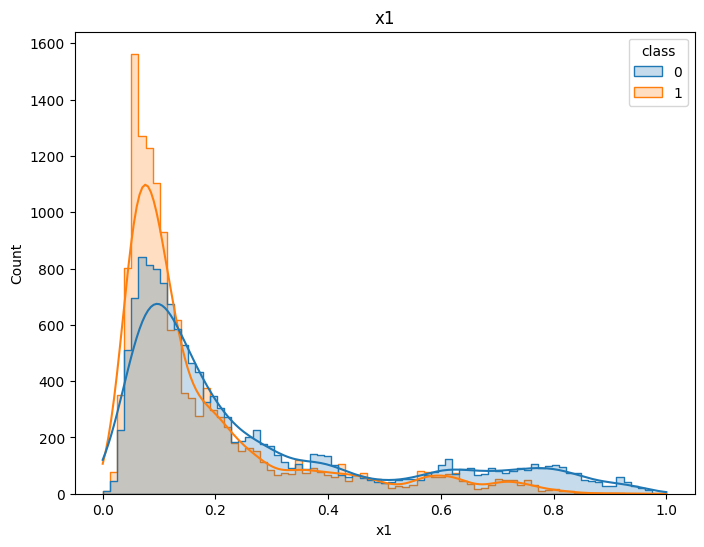

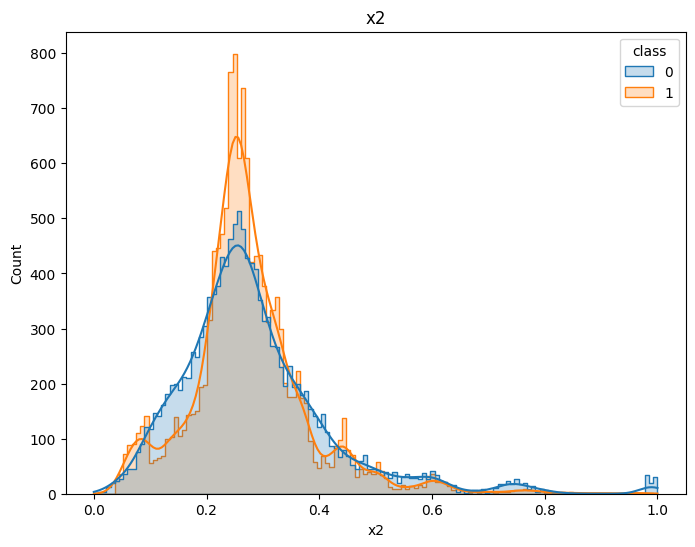

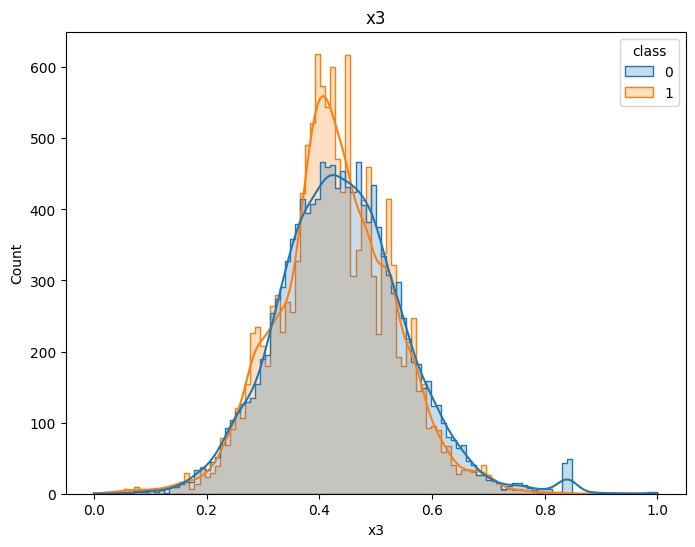

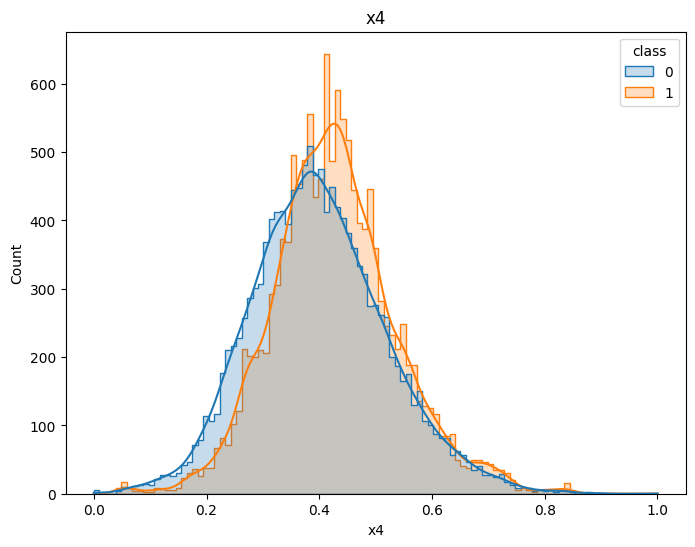

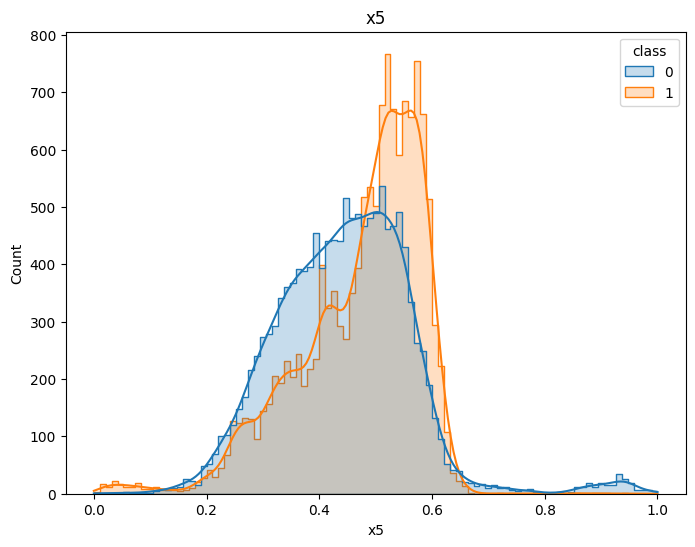

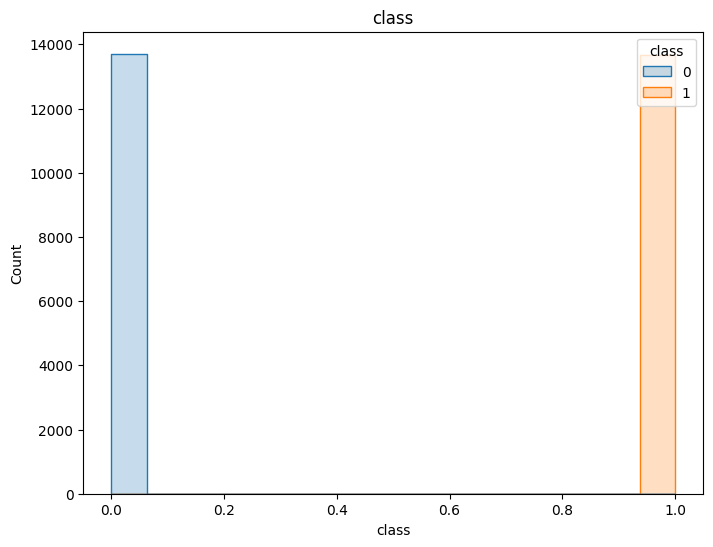

In [349]:
for col in train_dataset.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=train_dataset, x=train_dataset.loc[train_dataset[col].notnull(), col],
                 hue='class', kde=True, element="step", common_norm=False)
    plt.title(col)

<Figure size 800x500 with 0 Axes>

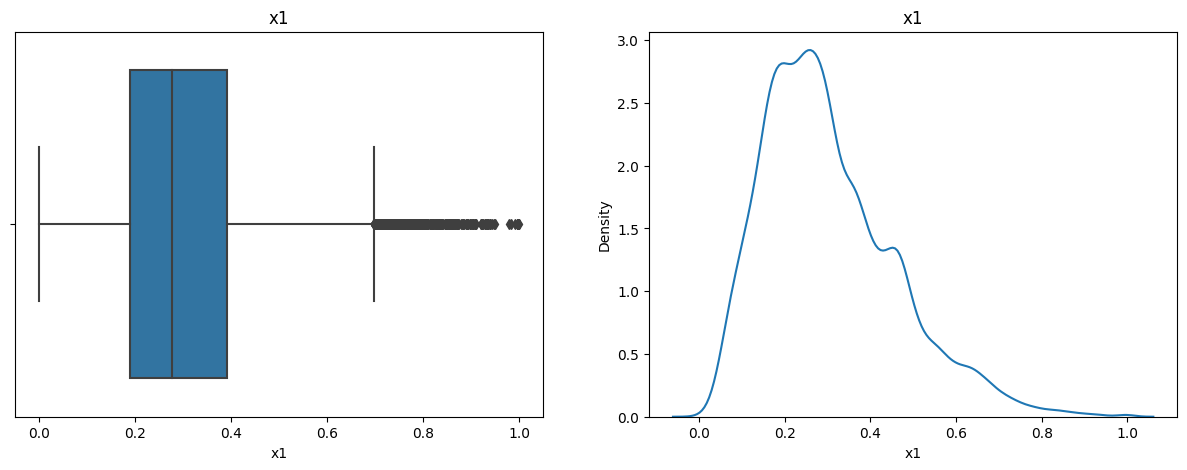

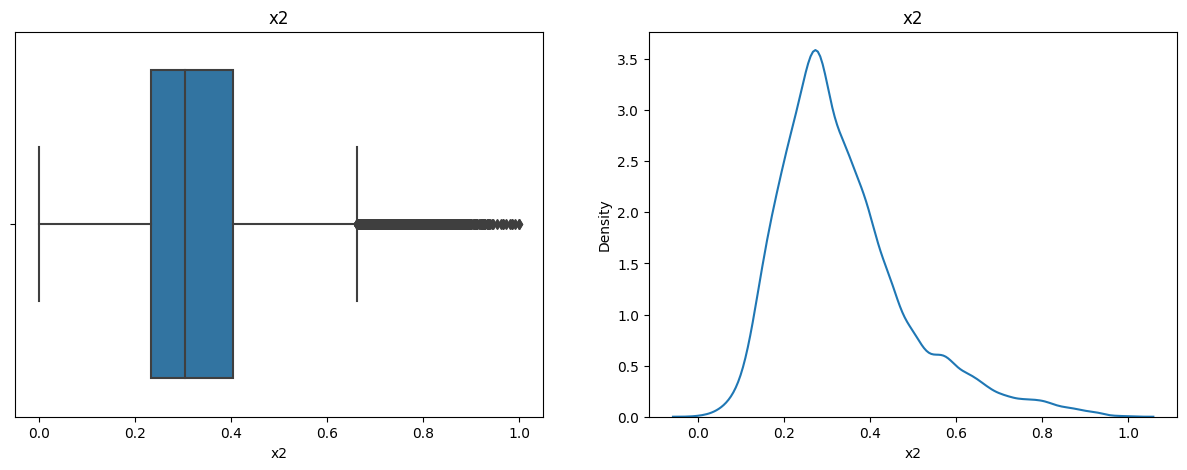

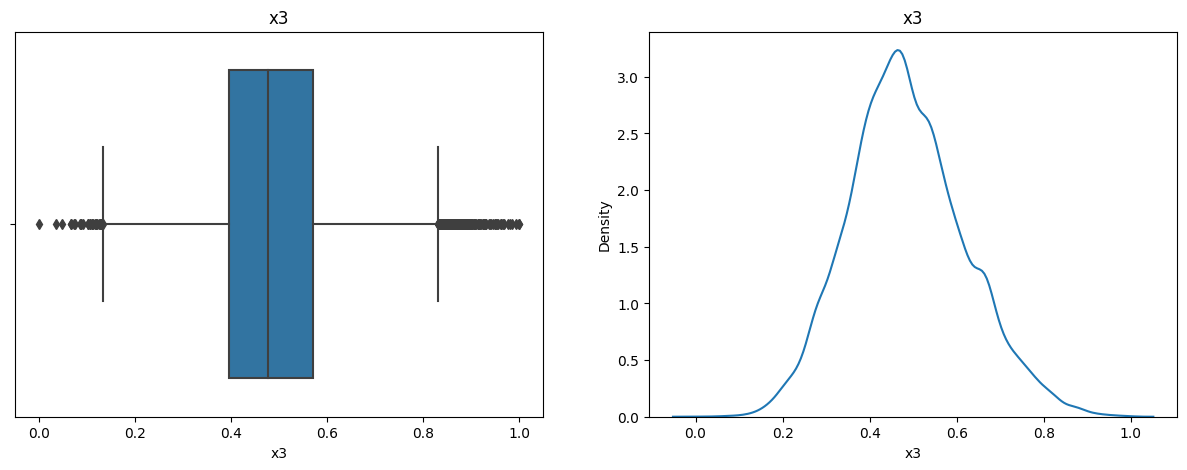

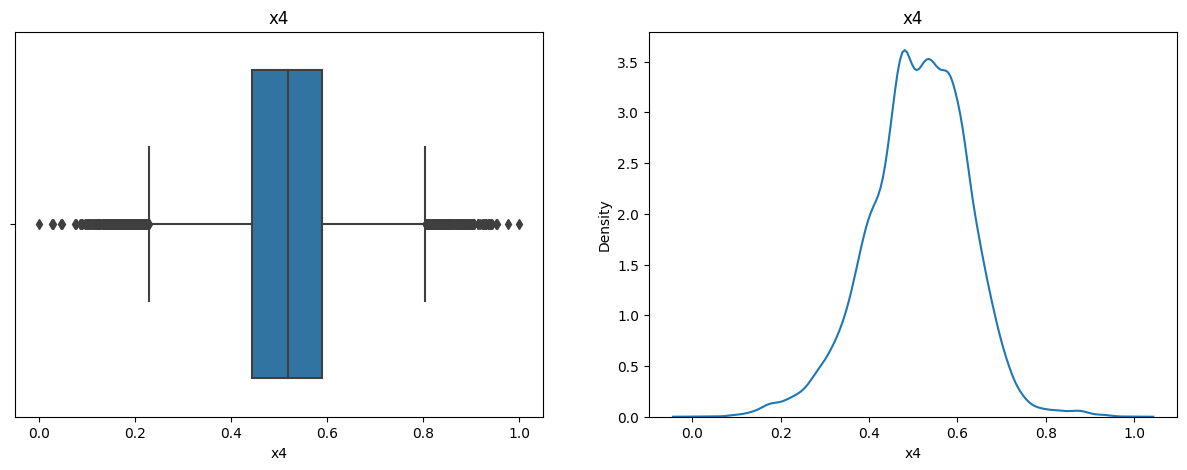

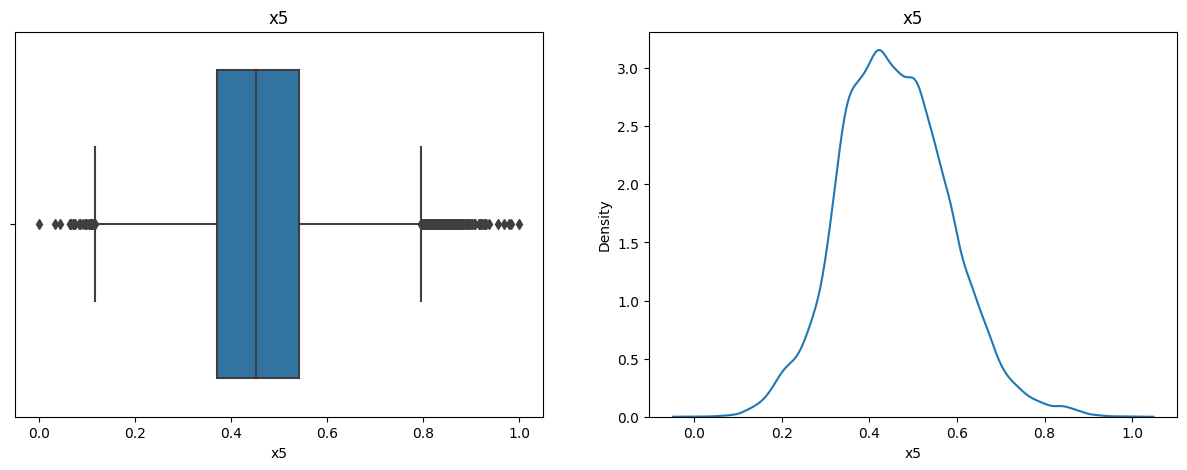

In [267]:
# 연속변인 박스 플롯
plt.figure(figsize = (8,5))
for col in train_dataset.drop("class", axis = 1).columns:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    sns.boxplot(data = train_dataset, x = col, ax=axes[0])
    axes[0].set_title(col)

    sns.kdeplot(data = train_dataset, x = col, ax=axes[1])
    axes[1].set_title(col)

    plt.show()

# TF-IDF 임베딩 & PCA를 통한 차원축소

In [423]:
!pip install konlpy
!pip install python-mecab-ko # 토크나이저

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 17.9 MB/s eta 0:00:00


In [424]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import mecab

In [425]:
df_sample = df[["comment", "class"]].reset_index(drop = True)
df_sample

,comment,class
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,0
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,0
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,0
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,0
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,0
...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,0
17543,집에서 당신이 키우세요,0
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,0
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,0


In [426]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
m = mecab.MeCab()

In [427]:
#okt = Okt()
tokenized_data = []
for sentence in df['comment']:
    temp_X = m.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

df_sample["tokenized"] = tokenized_data

df_sample

,comment,class,tokenized
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,0,"[cctv, 버젓이, 있, 는데, 무슨, 생각, 저랬, 을까]"
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,0,"[35, 년, 에서, 판사, 용서, 해, 줘서, 형량, 줄어들, 지, 않, 았, 나]"
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,0,"[참고, 로, 주먹, 자기, 자신, 보다, 강한, 사람, 을, 때리, 것, 지요]"
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,0,"[사회, 나와, 봐야, 도움, 안, 됨, 사형, 답, 또, 다른, 피해자, 만들, ..."
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,0,"[된, 일, 기, 한데, 어, 케, 조두순, 보다, 형량, 높, 지]"
...,...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,0,"[자식, 없, 걸, 지구, 님, 바라, 실, 겁니다, 인간, 번식, 가치, 쓸모, ..."
17543,집에서 당신이 키우세요,0,"[집, 에서, 당신, 키우, 세요]"
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,0,"[애, 소중히, 한다고, 하, 면서, 애, 망치, 부모]"
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,0,"[부모, 아니, 라, 정확히, 엄마, 선생, 괴롭히, 거, 다, 여자, 임]"


In [428]:
df_sample = df_sample[['comment','tokenized', "class"]]
df_sample

,comment,tokenized,class
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,"[cctv, 버젓이, 있, 는데, 무슨, 생각, 저랬, 을까]",0
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,"[35, 년, 에서, 판사, 용서, 해, 줘서, 형량, 줄어들, 지, 않, 았, 나]",0
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,"[참고, 로, 주먹, 자기, 자신, 보다, 강한, 사람, 을, 때리, 것, 지요]",0
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,"[사회, 나와, 봐야, 도움, 안, 됨, 사형, 답, 또, 다른, 피해자, 만들, ...",0
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,"[된, 일, 기, 한데, 어, 케, 조두순, 보다, 형량, 높, 지]",0
...,...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,"[자식, 없, 걸, 지구, 님, 바라, 실, 겁니다, 인간, 번식, 가치, 쓸모, ...",0
17543,집에서 당신이 키우세요,"[집, 에서, 당신, 키우, 세요]",0
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,"[애, 소중히, 한다고, 하, 면서, 애, 망치, 부모]",0
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,"[부모, 아니, 라, 정확히, 엄마, 선생, 괴롭히, 거, 다, 여자, 임]",0


In [429]:
# 리스트를 문자열로 변환하는 함수 정의
def list_to_string(lst):
    return ', '.join(map(str, lst))

okt = Okt()
def stemming(word):
  stem_word = okt.morphs(word ,stem=True)
  return stem_word

def remove_commas(lst):
    return [word for word in lst if word != ',']

In [430]:
df_sample['tokenized'] = df_sample['tokenized'].apply(list_to_string)
df_sample

,comment,tokenized,class
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,"cctv, 버젓이, 있, 는데, 무슨, 생각, 저랬, 을까",0
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,"35, 년, 에서, 판사, 용서, 해, 줘서, 형량, 줄어들, 지, 않, 았, 나",0
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,"참고, 로, 주먹, 자기, 자신, 보다, 강한, 사람, 을, 때리, 것, 지요",0
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,"사회, 나와, 봐야, 도움, 안, 됨, 사형, 답, 또, 다른, 피해자, 만들, 지...",0
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,"된, 일, 기, 한데, 어, 케, 조두순, 보다, 형량, 높, 지",0
...,...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,"자식, 없, 걸, 지구, 님, 바라, 실, 겁니다, 인간, 번식, 가치, 쓸모, 없...",0
17543,집에서 당신이 키우세요,"집, 에서, 당신, 키우, 세요",0
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,"애, 소중히, 한다고, 하, 면서, 애, 망치, 부모",0
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,"부모, 아니, 라, 정확히, 엄마, 선생, 괴롭히, 거, 다, 여자, 임",0


In [431]:
df_sample['tokenized'] = df_sample['tokenized'].apply(stemming)
df_sample

,comment,tokenized,class
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,"[cctv, ,, 버젓이, ,, 있다, ,, 는데, ,, 무슨, ,, 생각, ,, ...",0
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,"[35, ,, 년, ,, 에서, ,, 판사, ,, 용서, ,, 해, ,, 주다, ,...",0
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,"[참고, ,, 로, ,, 주먹, ,, 자기, ,, 자신, ,, 보다, ,, 강하다,...",0
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,"[사회, ,, 나오다, ,, 보다, ,, 도움, ,, 안, ,, 되다, ,, 사형,...",0
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,"[되다, ,, 일, ,, 기, ,, 한데, ,, 어, ,, 케, ,, 조두순, ,,...",0
...,...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,"[자식, ,, 없다, ,, 걸, ,, 지구, ,, 님, ,, 바라다, ,, 실, ,...",0
17543,집에서 당신이 키우세요,"[집, ,, 에서, ,, 당신, ,, 키우다, ,, 세요]",0
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,"[애, ,, 소중하다, ,, 하다, ,, 하, ,, 면서, ,, 애, ,, 망치, ...",0
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,"[부모, ,, 아니다, ,, 라, ,, 정확하다, ,, 엄마, ,, 선생, ,, 괴...",0


In [432]:
df_sample['tokenized'] = df_sample['tokenized'].apply(remove_commas)
df_sample

,comment,tokenized,class
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,"[cctv, 버젓이, 있다, 는데, 무슨, 생각, 저렇다, 을까]",0
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,"[35, 년, 에서, 판사, 용서, 해, 주다, 형량, 줄어들다, 지다, 않다, 았...",0
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,"[참고, 로, 주먹, 자기, 자신, 보다, 강하다, 사람, 을, 때리다, 것, 지요]",0
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,"[사회, 나오다, 보다, 도움, 안, 되다, 사형, 답, 또, 다른, 피해자, 만들...",0
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,"[되다, 일, 기, 한데, 어, 케, 조두순, 보다, 형량, 높다, 지다]",0
...,...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,"[자식, 없다, 걸, 지구, 님, 바라다, 실, 겁니다, 인간, 번식, 가치, 쓸모...",0
17543,집에서 당신이 키우세요,"[집, 에서, 당신, 키우다, 세요]",0
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,"[애, 소중하다, 하다, 하, 면서, 애, 망치, 부모]",0
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,"[부모, 아니다, 라, 정확하다, 엄마, 선생, 괴롭히다, 거, 다, 여자, 임]",0


In [433]:
df_sample['tokenized'] = df_sample['tokenized'].apply(list_to_string)
df_sample

,comment,tokenized,class
0,cctv가 버젓이 있는데무슨 생각으로 저랬을까,"cctv, 버젓이, 있다, 는데, 무슨, 생각, 저렇다, 을까",0
1,35년에서 판사가 용서해줘서 형량 줄어들지 않았나,"35, 년, 에서, 판사, 용서, 해, 주다, 형량, 줄어들다, 지다, 않다, 았, 나",0
2,참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요,"참고, 로, 주먹, 자기, 자신, 보다, 강하다, 사람, 을, 때리다, 것, 지요",0
3,사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서,"사회, 나오다, 보다, 도움, 안, 되다, 사형, 답, 또, 다른, 피해자, 만들다...",0
4,잘 된 일이기는 한데 어케 조두순보다 형량이 높지,"되다, 일, 기, 한데, 어, 케, 조두순, 보다, 형량, 높다, 지다",0
...,...,...,...
17542,자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...,"자식, 없다, 걸, 지구, 님, 바라다, 실, 겁니다, 인간, 번식, 가치, 쓸모,...",0
17543,집에서 당신이 키우세요,"집, 에서, 당신, 키우다, 세요",0
17544,애를 소중히 한다고는 하면서 애 망치는 부모들,"애, 소중하다, 하다, 하, 면서, 애, 망치, 부모",0
17545,부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임,"부모, 아니다, 라, 정확하다, 엄마, 선생, 괴롭히다, 거, 다, 여자, 임",0


In [434]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample["tokenized"])

In [435]:
tfidf_matrix

<17547x10306 sparse matrix of type '<class 'numpy.float64'>'
	with 161468 stored elements in Compressed Sparse Row format>

In [436]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [437]:
# 사실 p-value값이 아래에서 높게 나오는 이유는 이 과정부터의 문제라고 보입니다.
# 모델을 통한 군집축소로 해야 할 수도 있어 보입니다.

# PCA를 사용하여 차원 축소
n_components = 5  # 원하는 차원 수
pca = PCA(n_components=n_components)
corpus_embeddings = pca.fit_transform(tfidf_matrix.toarray())

In [438]:
corpus_embeddings

array([[-0.01734636, -0.04483834, -0.02353548,  0.00311826, -0.00945631],
       [-0.04015106, -0.03616944, -0.0939087 ,  0.07668351,  0.02408946],
       [-0.01650903, -0.03371563, -0.00270804, -0.01138252, -0.05413765],
       ...,
       [-0.03102206, -0.04134609, -0.03651066, -0.00357091,  0.0712405 ],
       [-0.02478937, -0.04917317, -0.04649584,  0.01277   , -0.02834258],
       [-0.0209779 , -0.03069918, -0.02409771,  0.00033005, -0.04214463]])

In [439]:
df_sembed = pd.DataFrame(corpus_embeddings)
df_sembed["class"] = df_sample["class"]
df_sembed

,0,1,2,3,4,class
0,-0.017346,-0.044838,-0.023535,0.003118,-0.009456,0
1,-0.040151,-0.036169,-0.093909,0.076684,0.024089,0
2,-0.016509,-0.033716,-0.002708,-0.011383,-0.054138,0
3,-0.111031,0.124890,-0.042670,0.039741,0.057646,0
4,-0.027953,-0.042133,-0.059583,0.048160,0.029499,0
...,...,...,...,...,...,...
17542,-0.040793,-0.023360,-0.052527,0.015232,0.003716,0
17543,-0.037327,-0.051569,-0.129653,0.094133,0.008887,0
17544,-0.031022,-0.041346,-0.036511,-0.003571,0.071240,0
17545,-0.024789,-0.049173,-0.046496,0.012770,-0.028343,0


In [440]:
# 줄인 차원 수에 대응되게끔 열 이름 변경
x_columns = []

for i in range(1, len(df_sembed.columns)):
  x_columns.append(f"x{i}")

x_columns.append("class")
df_sembed.columns = x_columns
df_sembed

,x1,x2,x3,x4,x5,class
0,-0.017346,-0.044838,-0.023535,0.003118,-0.009456,0
1,-0.040151,-0.036169,-0.093909,0.076684,0.024089,0
2,-0.016509,-0.033716,-0.002708,-0.011383,-0.054138,0
3,-0.111031,0.124890,-0.042670,0.039741,0.057646,0
4,-0.027953,-0.042133,-0.059583,0.048160,0.029499,0
...,...,...,...,...,...,...
17542,-0.040793,-0.023360,-0.052527,0.015232,0.003716,0
17543,-0.037327,-0.051569,-0.129653,0.094133,0.008887,0
17544,-0.031022,-0.041346,-0.036511,-0.003571,0.071240,0
17545,-0.024789,-0.049173,-0.046496,0.012770,-0.028343,0


In [441]:
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
smoteto

SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

In [442]:
X, y = smoteto.fit_resample(df_sembed.drop("class", axis = 1), df_sembed["class"])

In [444]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96, shuffle=True)

In [445]:
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (27316, 5)
X_test shape :  (6829, 5)
y_train shape :  (27316,)
y_test shape :  (6829,)


In [443]:
from sklearn.utils.class_weight import compute_class_weight

In [446]:
train_dataset = X_train.copy()
train_dataset['class'] = y_train
train_dataset

,x1,x2,x3,x4,x5,class
28777,-0.007876,-0.033353,0.017787,-0.026920,-0.053391,1
15880,-0.035457,-0.029491,-0.059875,0.016335,-0.007667,0
13937,-0.048291,-0.070460,-0.173827,0.157128,0.136442,0
4090,-0.076784,0.047158,-0.053678,0.017917,-0.059133,0
12732,-0.011648,-0.053748,-0.004173,0.027524,0.034119,0
...,...,...,...,...,...,...
2614,-0.011202,-0.035289,0.004760,-0.009519,-0.056682,0
22132,-0.037681,-0.056547,-0.108403,0.089185,0.090050,1
2412,-0.104578,0.138803,0.005975,-0.020532,0.023566,0
9638,0.007918,-0.048132,0.064797,-0.047076,-0.022486,0


In [447]:
# train dataset에 다운/업샘플링, 가중치 조정
weight1 = compute_class_weight('balanced',
                     classes=np.unique(train_dataset["class"]),
                     y = train_dataset["class"])
weight1

array([1.00176031, 0.99824587])

In [448]:
  # 이상치에 각 열마다 구한 가중치를 반영
  column_index = train_dataset.drop("class", axis = 1).describe().columns
  for col in range(len(column_index)):
    train_dataset[column_index[col]] = np.where(train_dataset['class'] == 1, train_dataset[column_index[col]] * weight1[1] , train_dataset[column_index[col]])
  # 정상치에 각 열마다 구한 가중치를 반영
  column_index = train_dataset.drop("class", axis = 1).describe().columns
  for col in range(len(column_index)):
    train_dataset[column_index[col]] = np.where(train_dataset['class'] == 0, train_dataset[column_index[col]] * weight1[0], train_dataset[column_index[col]])

In [449]:
# min_max_normalization 함수
def min_max_normalization(x):
    min_val = x.min()
    max_val = x.max()
    normalized_x = (x - min_val) / (max_val - min_val)
    return normalized_x

In [450]:
# normalization 적용을 하기 전에 y값을 뺌
# y값에 normalization을 적용할 필요는 없기 때문.

# min_max_normalization을 train data에 적용
for col in X_train.columns:
    train_dataset[col] = min_max_normalization(train_dataset[col])

# min_max_normalization을 test data에 적용
for col in X_test.columns:
    X_test[col] = min_max_normalization(X_test[col])

X_train = train_dataset.drop("class", axis = 1)
y_train = train_dataset["class"]
X_train

,x1,x2,x3,x4,x5
28777,0.293444,0.079887,0.395986,0.401680,0.224636
15880,0.271626,0.083958,0.321460,0.435677,0.274327
13937,0.261484,0.039411,0.212022,0.546579,0.431583
4090,0.238968,0.167302,0.327412,0.436923,0.218165
12732,0.290441,0.057583,0.374956,0.444491,0.319925
...,...,...,...,...,...
2614,0.290794,0.077655,0.383534,0.415313,0.220841
22132,0.269973,0.054755,0.275219,0.492814,0.380614
2412,0.217003,0.266951,0.384702,0.406638,0.308409
9638,0.305903,0.063689,0.441193,0.385729,0.258156


# 일단 이상치 모델 돌려보자

를 하기 전에 minority class쪽으로 가중치를 더 주는 작업을 해보자

In [48]:
from pyod.models.pca import PCA


### Isolation Forest

In [451]:
from pyod.models.iforest import IForest
contamination = 0.1
IForest = IForest(contamination=contamination, random_state=96)
IForest.fit(X_train)
IForest_train_pred = IForest.predict(X_train)
IForest_test_pred = IForest.predict(X_test)
y_scores = IForest.decision_function(X_test)

In [452]:
result = X_test.copy()
result['y_scores'] = y_scores
result['y_test'] = y_test
result['IForest_test_pred'] = IForest_test_pred

In [453]:
result

,x1,x2,x3,x4,x5,y_scores,y_test,IForest_test_pred
15359,0.300190,0.085221,0.442095,0.422293,0.198944,-0.123027,0,0
28148,0.285163,0.083428,0.433014,0.420365,0.266456,-0.155419,1,0
13724,0.292558,0.082623,0.434626,0.424825,0.206730,-0.142731,0,0
33686,0.283943,0.082501,0.405933,0.453874,0.261637,-0.153554,1,0
23365,0.264704,0.155427,0.430965,0.426256,0.213073,-0.094444,1,0
...,...,...,...,...,...,...,...,...
2149,0.281176,0.067501,0.366174,0.461766,0.264642,-0.156694,0,0
25010,0.276906,0.053704,0.378973,0.455897,0.317869,-0.141545,1,0
6832,0.283478,0.080966,0.423726,0.424912,0.237305,-0.157672,0,0
30845,0.286676,0.083486,0.427254,0.424175,0.218398,-0.153371,1,0


In [459]:
result['IForest_test_pred'] = np.where(result['y_scores'] < -0.05, 1, 0)
con_mat = confusion_matrix(result['y_test'], result['IForest_test_pred'])
con_mat

array([[ 906, 2476],
       [ 339, 3108]])

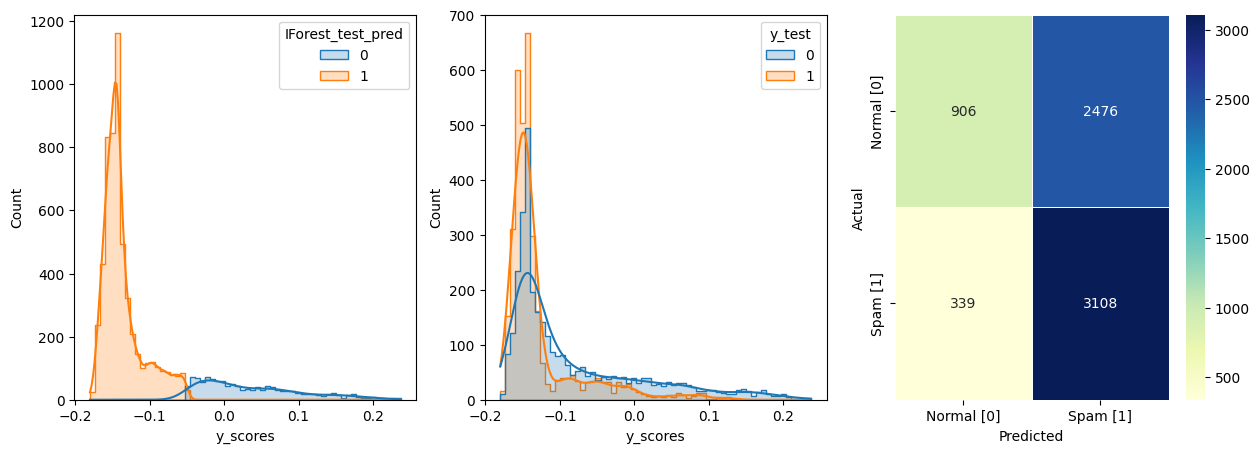

X_train shape :  (27316, 5)
X_test shape :  (6829, 5)
y_train shape :  (27316,)
y_test shape :  (6829,)
contamination: 0.1
con_mat:
[[ 906 2476]
 [ 339 3108]]
accuracy:  0.4242202372236052
recall:  0.04
precision:  0.181
f1-score:  0.065




In [460]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
sns.histplot(data=result, x="y_scores", hue='IForest_test_pred',
              kde=True, element="step", common_norm=False, ax=axes[0])
sns.histplot(data=result, x="y_scores", hue='y_test',
              kde=True, element="step", common_norm=False, ax=axes[1])

con_mat = confusion_matrix(result['y_test'], result['IForest_test_pred'])
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
              xticklabels=['Normal [0]', 'Spam [1]'],
              yticklabels=['Normal [0]', 'Spam [1]'],
              annot=True, fmt="d", linewidths=.5, cmap="YlGnBu", ax=axes[2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)
print("contamination:", contamination)
print("con_mat:")
print(con_mat)
print("accuracy: ", accuracy_score(y_test, IForest_test_pred))
print("recall: ", round(recall_score(y_test, IForest_test_pred),3))
print("precision: ", round(precision_score(y_test, IForest_test_pred),3))
print("f1-score: ", round(f1_score(y_test, IForest_test_pred),3))
print()
print()

In [456]:
# 임계치 grid search
threshold_list = np.arange(-0.05, 0.1, 0.005).tolist()
tp_list = []
fp_list = []
fn_list = []
tn_list = []

for i in range(len(threshold_list)):
  result['IForest_test_pred'] = np.where(result['y_scores'] > threshold_list[i], 1, 0)
  con_mat = confusion_matrix(result['y_test'], result['IForest_test_pred'])
  tp_list.append(con_mat[0][0])
  fp_list.append(con_mat[0][1])
  fn_list.append(con_mat[1][0])
  tn_list.append(con_mat[1][1])

print(tp_list)
print(fp_list)
print(fn_list)
print(tn_list)

[2476, 2499, 2531, 2555, 2583, 2620, 2654, 2682, 2712, 2732, 2760, 2787, 2807, 2840, 2869, 2895, 2910, 2931, 2946, 2972, 2996, 3015, 3035, 3067, 3080, 3101, 3120, 3132, 3143, 3157, 3173]
[906, 883, 851, 827, 799, 762, 728, 700, 670, 650, 622, 595, 575, 542, 513, 487, 472, 451, 436, 410, 386, 367, 347, 315, 302, 281, 262, 250, 239, 225, 209]
[3108, 3136, 3160, 3181, 3200, 3211, 3236, 3248, 3274, 3293, 3310, 3319, 3331, 3338, 3343, 3346, 3349, 3355, 3358, 3365, 3369, 3372, 3377, 3388, 3394, 3398, 3402, 3410, 3418, 3429, 3431]
[339, 311, 287, 266, 247, 236, 211, 199, 173, 154, 137, 128, 116, 109, 104, 101, 98, 92, 89, 82, 78, 75, 70, 59, 53, 49, 45, 37, 29, 18, 16]


In [457]:
df_threshold = pd.DataFrame()
df_threshold['tp'] = tp_list
df_threshold['fp'] = fp_list
df_threshold['fn'] = fn_list
df_threshold['tn'] = tn_list
df_threshold['threshold'] = threshold_list

df_threshold

,tp,fp,fn,tn,threshold
0,2476,906,3108,339,-5.000000e-02
1,2499,883,3136,311,-4.500000e-02
2,2531,851,3160,287,-4.000000e-02
3,2555,827,3181,266,-3.500000e-02
4,2583,799,3200,247,-3.000000e-02
5,2620,762,3211,236,-2.500000e-02
6,2654,728,3236,211,-2.000000e-02
7,2682,700,3248,199,-1.500000e-02
8,2712,670,3274,173,-1.000000e-02
9,2732,650,3293,154,-5.000000e-03


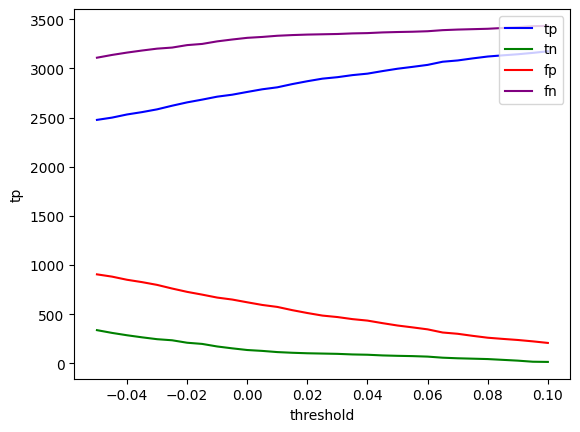

In [458]:
# 데이터프레임 df_threshold와 그래프 그리기
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['tp'], label="tp", color="blue")
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['tn'], label="tn", color="green")
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['fp'], label="fp", color="red")
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['fn'], label="fn", color="purple")

# 범례 위치 설정
plt.legend(loc="upper right")

### LOF

In [461]:
from sklearn.neighbors import LocalOutlierFactor
contamination = 0.1
LOF = LocalOutlierFactor(contamination=contamination)
LOF.fit(X_train)
LOF_train_pred = IForest.predict(X_train)
LOF_test_pred = IForest.predict(X_test)
y_scores = IForest.decision_function(X_test)

In [462]:
result = X_test.copy()
result['y_scores'] = y_scores
result['y_test'] = y_test
result['LOF_test_pred'] = LOF_test_pred

In [463]:
result

,x1,x2,x3,x4,x5,y_scores,y_test,LOF_test_pred
15359,0.300190,0.085221,0.442095,0.422293,0.198944,-0.123027,0,0
28148,0.285163,0.083428,0.433014,0.420365,0.266456,-0.155419,1,0
13724,0.292558,0.082623,0.434626,0.424825,0.206730,-0.142731,0,0
33686,0.283943,0.082501,0.405933,0.453874,0.261637,-0.153554,1,0
23365,0.264704,0.155427,0.430965,0.426256,0.213073,-0.094444,1,0
...,...,...,...,...,...,...,...,...
2149,0.281176,0.067501,0.366174,0.461766,0.264642,-0.156694,0,0
25010,0.276906,0.053704,0.378973,0.455897,0.317869,-0.141545,1,0
6832,0.283478,0.080966,0.423726,0.424912,0.237305,-0.157672,0,0
30845,0.286676,0.083486,0.427254,0.424175,0.218398,-0.153371,1,0


In [472]:
result['LOF_test_pred'] = np.where(result['y_scores'] < -0.05, 1, 0)
con_mat = confusion_matrix(result['y_test'], result['LOF_test_pred'])
con_mat

array([[ 906, 2476],
       [ 339, 3108]])

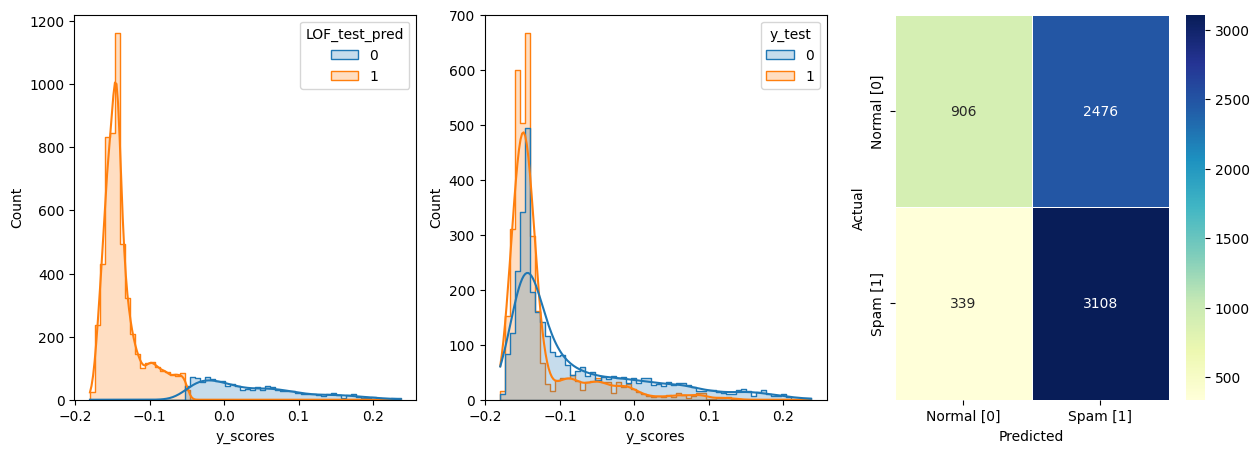

X_train shape :  (27316, 5)
X_test shape :  (6829, 5)
y_train shape :  (27316,)
y_test shape :  (6829,)
contamination: 0.1
con_mat:
[[ 906 2476]
 [ 339 3108]]
accuracy:  0.4242202372236052
recall:  0.04
precision:  0.181
f1-score:  0.065




In [473]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
sns.histplot(data=result, x="y_scores", hue='LOF_test_pred',
              kde=True, element="step", common_norm=False, ax=axes[0])
sns.histplot(data=result, x="y_scores", hue='y_test',
              kde=True, element="step", common_norm=False, ax=axes[1])

con_mat = confusion_matrix(result['y_test'], result['LOF_test_pred'])
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
              xticklabels=['Normal [0]', 'Spam [1]'],
              yticklabels=['Normal [0]', 'Spam [1]'],
              annot=True, fmt="d", linewidths=.5, cmap="YlGnBu", ax=axes[2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)
print("contamination:", contamination)
print("con_mat:")
print(con_mat)
print("accuracy: ", accuracy_score(y_test, LOF_test_pred))
print("recall: ", round(recall_score(y_test, LOF_test_pred),3))
print("precision: ", round(precision_score(y_test, LOF_test_pred),3))
print("f1-score: ", round(f1_score(y_test, LOF_test_pred),3))
print()
print()

In [469]:
# 임계치 grid search
threshold_list = np.arange(-0.05, 0.1, 0.005).tolist()
tp_list = []
fp_list = []
fn_list = []
tn_list = []

for i in range(len(threshold_list)):
  result['LOF_test_pred'] = np.where(result['y_scores'] > threshold_list[i], 1, 0)
  con_mat = confusion_matrix(result['y_test'], result['LOF_test_pred'])
  tp_list.append(con_mat[0][0])
  fp_list.append(con_mat[0][1])
  fn_list.append(con_mat[1][0])
  tn_list.append(con_mat[1][1])

print(tp_list)
print(fp_list)
print(fn_list)
print(tn_list)

[2476, 2499, 2531, 2555, 2583, 2620, 2654, 2682, 2712, 2732, 2760, 2787, 2807, 2840, 2869, 2895, 2910, 2931, 2946, 2972, 2996, 3015, 3035, 3067, 3080, 3101, 3120, 3132, 3143, 3157, 3173]
[906, 883, 851, 827, 799, 762, 728, 700, 670, 650, 622, 595, 575, 542, 513, 487, 472, 451, 436, 410, 386, 367, 347, 315, 302, 281, 262, 250, 239, 225, 209]
[3108, 3136, 3160, 3181, 3200, 3211, 3236, 3248, 3274, 3293, 3310, 3319, 3331, 3338, 3343, 3346, 3349, 3355, 3358, 3365, 3369, 3372, 3377, 3388, 3394, 3398, 3402, 3410, 3418, 3429, 3431]
[339, 311, 287, 266, 247, 236, 211, 199, 173, 154, 137, 128, 116, 109, 104, 101, 98, 92, 89, 82, 78, 75, 70, 59, 53, 49, 45, 37, 29, 18, 16]


In [470]:
df_threshold = pd.DataFrame()
df_threshold['tp'] = tp_list
df_threshold['fp'] = fp_list
df_threshold['fn'] = fn_list
df_threshold['tn'] = tn_list
df_threshold['threshold'] = threshold_list

df_threshold

,tp,fp,fn,tn,threshold
0,2476,906,3108,339,-5.000000e-02
1,2499,883,3136,311,-4.500000e-02
2,2531,851,3160,287,-4.000000e-02
3,2555,827,3181,266,-3.500000e-02
4,2583,799,3200,247,-3.000000e-02
5,2620,762,3211,236,-2.500000e-02
6,2654,728,3236,211,-2.000000e-02
7,2682,700,3248,199,-1.500000e-02
8,2712,670,3274,173,-1.000000e-02
9,2732,650,3293,154,-5.000000e-03


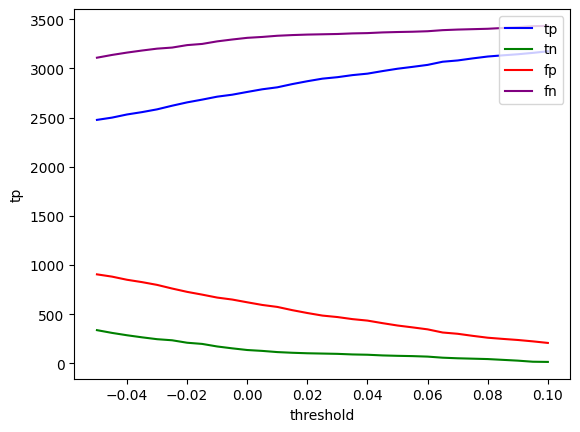

In [471]:
# 데이터프레임 df_threshold와 그래프 그리기
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['tp'], label="tp", color="blue")
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['tn'], label="tn", color="green")
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['fp'], label="fp", color="red")
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['fn'], label="fn", color="purple")

# 범례 위치 설정
plt.legend(loc="upper right")

### PCA

In [474]:
from pyod.models.pca import PCA
contamination = 0.1
PCA = PCA(contamination=contamination)
PCA.fit(X_train)
PCA_train_pred = PCA.predict(X_train)
PCA_test_pred = PCA.predict(X_test)
y_scores = PCA.decision_function(X_test)

In [475]:
result = X_test.copy()
result['y_scores'] = y_scores
result['y_test'] = y_test
result['PCA_test_pred'] = PCA_test_pred

In [476]:
result

,x1,x2,x3,x4,x5,y_scores,y_test,PCA_test_pred
15359,0.300190,0.085221,0.442095,0.422293,0.198944,50.951342,0,0
28148,0.285163,0.083428,0.433014,0.420365,0.266456,37.700882,1,0
13724,0.292558,0.082623,0.434626,0.424825,0.206730,48.039981,0,0
33686,0.283943,0.082501,0.405933,0.453874,0.261637,35.927008,1,0
23365,0.264704,0.155427,0.430965,0.426256,0.213073,46.040887,1,0
...,...,...,...,...,...,...,...,...
2149,0.281176,0.067501,0.366174,0.461766,0.264642,35.629384,0,0
25010,0.276906,0.053704,0.378973,0.455897,0.317869,34.318224,1,0
6832,0.283478,0.080966,0.423726,0.424912,0.237305,40.302058,0,0
30845,0.286676,0.083486,0.427254,0.424175,0.218398,44.273838,1,0


In [488]:
result['PCA_test_pred'] = np.where(result['y_scores'] < 90, 1, 0)
con_mat = confusion_matrix(result['y_test'], result['PCA_test_pred'])
con_mat

array([[ 574, 2808],
       [ 131, 3316]])

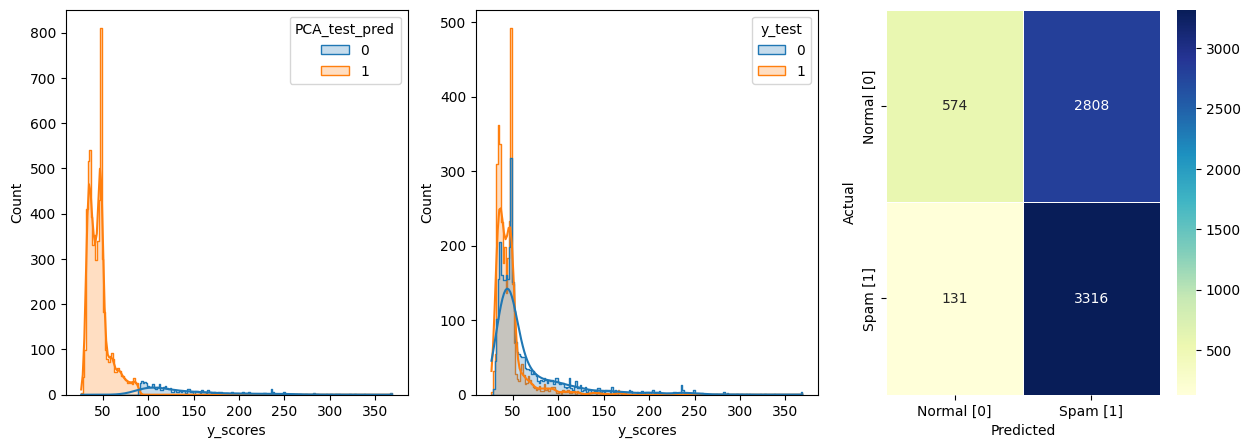

X_train shape :  (27316, 5)
X_test shape :  (6829, 5)
y_train shape :  (27316,)
y_test shape :  (6829,)
contamination: 0.1
con_mat:
[[ 574 2808]
 [ 131 3316]]
accuracy:  0.424659540196222
recall:  0.047
precision:  0.202
f1-score:  0.077




In [489]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
sns.histplot(data=result, x="y_scores", hue='PCA_test_pred',
              kde=True, element="step", common_norm=False, ax=axes[0])
sns.histplot(data=result, x="y_scores", hue='y_test',
              kde=True, element="step", common_norm=False, ax=axes[1])

con_mat = confusion_matrix(result['y_test'], result['PCA_test_pred'])
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
              xticklabels=['Normal [0]', 'Spam [1]'],
              yticklabels=['Normal [0]', 'Spam [1]'],
              annot=True, fmt="d", linewidths=.5, cmap="YlGnBu", ax=axes[2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)
print("contamination:", contamination)
print("con_mat:")
print(con_mat)
print("accuracy: ", accuracy_score(y_test, PCA_test_pred))
print("recall: ", round(recall_score(y_test, PCA_test_pred),3))
print("precision: ", round(precision_score(y_test, PCA_test_pred),3))
print("f1-score: ", round(f1_score(y_test, PCA_test_pred),3))
print()
print()

In [485]:
# 임계치 grid search
threshold_list = np.arange(80, 100, 1).tolist()
tp_list = []
fp_list = []
fn_list = []
tn_list = []

for i in range(len(threshold_list)):
  result['PCA_test_pred'] = np.where(result['y_scores'] > threshold_list[i], 1, 0)
  con_mat = confusion_matrix(result['y_test'], result['PCA_test_pred'])
  tp_list.append(con_mat[0][0])
  fp_list.append(con_mat[0][1])
  fn_list.append(con_mat[1][0])
  tn_list.append(con_mat[1][1])

print(tp_list)
print(fp_list)
print(fn_list)
print(tn_list)

[2698, 2707, 2719, 2735, 2737, 2753, 2765, 2778, 2788, 2802, 2808, 2820, 2831, 2838, 2851, 2860, 2871, 2879, 2896, 2909]
[684, 675, 663, 647, 645, 629, 617, 604, 594, 580, 574, 562, 551, 544, 531, 522, 511, 503, 486, 473]
[3272, 3276, 3279, 3283, 3286, 3295, 3300, 3305, 3311, 3314, 3316, 3320, 3325, 3333, 3336, 3345, 3349, 3353, 3355, 3356]
[175, 171, 168, 164, 161, 152, 147, 142, 136, 133, 131, 127, 122, 114, 111, 102, 98, 94, 92, 91]


In [486]:
df_threshold = pd.DataFrame()
df_threshold['tp'] = tp_list
df_threshold['fp'] = fp_list
df_threshold['fn'] = fn_list
df_threshold['tn'] = tn_list
df_threshold['threshold'] = threshold_list

df_threshold

,tp,fp,fn,tn,threshold
0,2698,684,3272,175,80
1,2707,675,3276,171,81
2,2719,663,3279,168,82
3,2735,647,3283,164,83
4,2737,645,3286,161,84
5,2753,629,3295,152,85
6,2765,617,3300,147,86
7,2778,604,3305,142,87
8,2788,594,3311,136,88
9,2802,580,3314,133,89


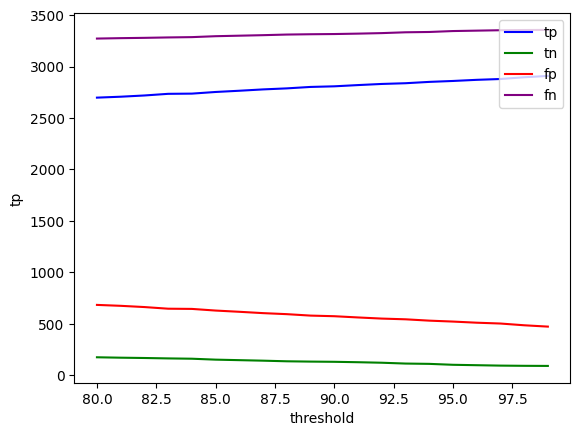

In [487]:
# 데이터프레임 df_threshold와 그래프 그리기
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['tp'], label="tp", color="blue")
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['tn'], label="tn", color="green")
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['fp'], label="fp", color="red")
sns.lineplot(x=df_threshold['threshold'], y=df_threshold['fn'], label="fn", color="purple")

# 범례 위치 설정
plt.legend(loc="upper right")

#  Auto-Encoder

In [490]:
import tensorflow as tf

In [491]:
input_dim = X_train.shape[1]

AE = tf.keras.models.Sequential([

    # encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

AE.compile(optimizer="adam", loss="mse")
AE.summary();

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 4)                 24        
                                                                 
 dense_12 (Dense)            (None, 2)                 10        
                                                                 
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
 dense_14 (Dense)            (None, 5)                 25        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [492]:
history = AE.fit(
    X_train,
    X_train,
    epochs=100,
    batch_size=32,
    validation_split=0.3
)

Epoch 1/100
598/598 [==============================] - 5s 6ms/step - loss: 0.0148 - val_loss: 0.0045
Epoch 2/100
598/598 [==============================] - 3s 4ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 3/100
598/598 [==============================] - 4s 6ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 4/100
598/598 [==============================] - 4s 6ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 5/100
598/598 [==============================] - 3s 5ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 6/100
598/598 [==============================] - 3s 5ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 7/100
598/598 [==============================] - 3s 5ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 8/100
598/598 [==============================] - 4s 6ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 9/100
598/598 [==============================] - 4s 6ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 10/100
598/598 [==============================] - 3s 5ms/step - loss: 0.0027 - val_lo

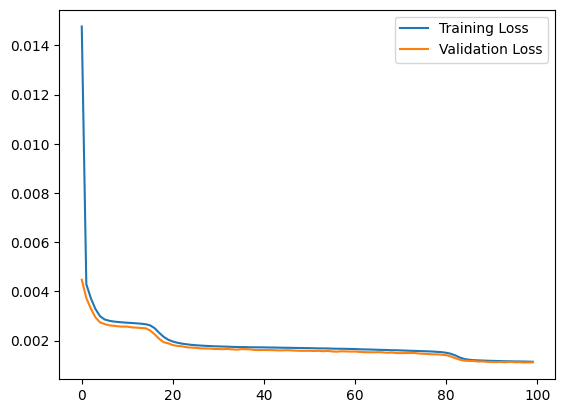

In [493]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [494]:
# train data에 대한 예측 값
AE_train_pred = AE.predict(X_train)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의 -> Novelty Score
train_mse = np.mean(np.power(X_train - AE_train_pred, 2), axis=1)
train_mse = pd.DataFrame({'Reconstruction_error': train_mse})
train_mse

854/854 [==============================] - 2s 2ms/step


,Reconstruction_error
28777,0.000070
15880,0.000686
13937,0.007984
4090,0.001044
12732,0.000303
...,...
2614,0.000008
22132,0.002927
2412,0.000234
9638,0.000919


In [495]:
# train 데이터에 대한 novelty score 기준 상위 10% 의 값을 임계치로 설정
AE_thresh = np.percentile(sorted(train_mse['Reconstruction_error']), 90)
AE_thresh

0.0025403442739810687

In [496]:
# test data에 대한 예측 값
AE_test_pred = AE.predict(X_test)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의
test_mse = np.mean(np.power(X_test - AE_test_pred, 2), axis=1)
test_mse

214/214 [==============================] - 0s 2ms/step


15359    0.000342
28148    0.000575
13724    0.000308
33686    0.000438
23365    0.001167
           ...   
2149     0.000469
25010    0.000309
6832     0.000321
30845    0.000304
6445     0.009886
Length: 6829, dtype: float64

In [497]:
# classifier
# AE_thresh 기준, test_mse 값이 더 크면 이상(1), 작으면 정상(0)으로 분류
AE_test_df = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > AE_thresh:
            AE_test_df.append(1)
        else:
            AE_test_df.append(0)

In [498]:
novelty_classifier(test_mse.values)

accuracy:  0.43696002342949186
recall:  0.058
precision:  0.25
f1-score:  0.094


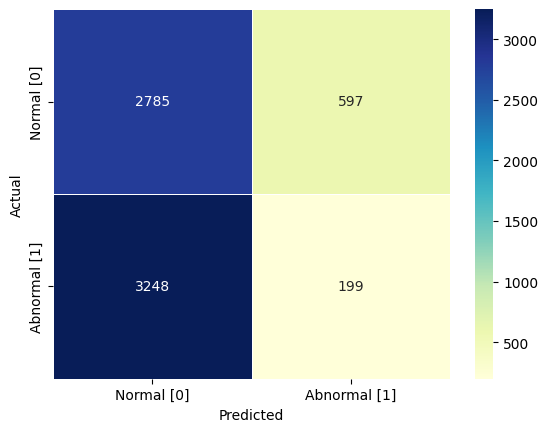

In [499]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, AE_test_df) #confusion_matrix 함수 실행

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, AE_test_df))
print("recall: ", round(recall_score(y_test, AE_test_df),3))
print("precision: ", round(precision_score(y_test, AE_test_df),3))
print("f1-score: ", round(f1_score(y_test, AE_test_df),3))

# Auto-Encoder + IForest

In [500]:
AE_train_pred = AE.predict(X_train)
AE_train_pred

854/854 [==============================] - 2s 2ms/step


array([[0.2905758 , 0.0862737 , 0.38417295, 0.41439408, 0.22342217],
       [0.27604595, 0.09335682, 0.37195635, 0.40999568, 0.2849953 ],
       [0.28035557, 0.03904733, 0.37215623, 0.42867982, 0.42684934],
       ...,
       [0.22041142, 0.27260506, 0.36292732, 0.40327105, 0.33371884],
       [0.29230493, 0.06303689, 0.39082393, 0.42169684, 0.23404792],
       [0.29621893, 0.09460187, 0.38716945, 0.41525835, 0.2043876 ]],
      dtype=float32)

In [501]:
AE_test_pred = AE.predict(X_test)
AE_test_pred

214/214 [==============================] - 0s 2ms/step


array([[ 3.0406696e-01,  7.7004850e-02,  4.0225768e-01,  4.2837501e-01,
         1.9677159e-01],
       [ 2.8753823e-01,  6.1903775e-02,  3.8484758e-01,  4.1889170e-01,
         2.5733915e-01],
       [ 2.9900733e-01,  7.1104050e-02,  3.9770123e-01,  4.2530620e-01,
         2.0881575e-01],
       ...,
       [ 2.9057938e-01,  6.4414591e-02,  3.8836390e-01,  4.2011571e-01,
         2.4004933e-01],
       [ 2.9420748e-01,  6.9702297e-02,  3.9190924e-01,  4.2144874e-01,
         2.2276452e-01],
       [ 2.9212537e-01, -7.0718408e-05,  3.8803089e-01,  4.3130964e-01,
         3.3057448e-01]], dtype=float32)

In [502]:
print(AE_train_pred.shape)
print(AE_test_pred.shape)

(27316, 5)
(6829, 5)


In [503]:
from pyod.models.iforest import IForest
from pyod.models.pca import PCA

In [504]:
IForest = IForest()
IForest.fit(AE_train_pred)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [505]:
IForest_train_pred = IForest.predict(AE_train_pred)
IForest_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [506]:
IForest_test_pred = IForest.predict(AE_test_pred)
IForest_test_pred

array([0, 0, 0, ..., 0, 0, 0])

accuracy:  0.4406208815346317
recall:  0.047
precision:  0.232
f1-score:  0.078


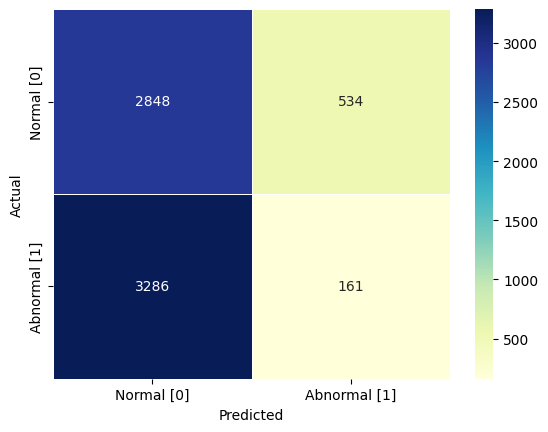

In [507]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, IForest_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, IForest_test_pred))
print("recall: ", round(recall_score(y_test, IForest_test_pred),3))
print("precision: ", round(precision_score(y_test, IForest_test_pred),3))
print("f1-score: ", round(f1_score(y_test, IForest_test_pred),3))

# Auto-Encoder + LOF

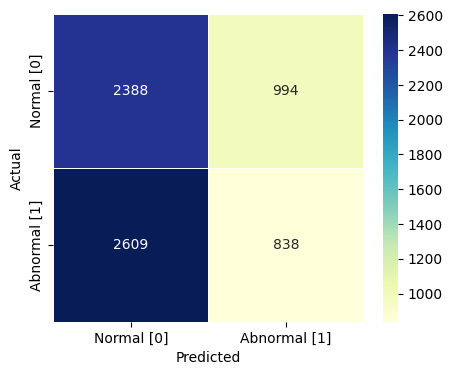

contamination: 0.075
con_mat:
[[2388  994]
 [2609  838]]
accuracy:  0.4723971298872456
recall:  0.243
precision:  0.457
f1-score:  0.317


In [508]:
from sklearn.neighbors import LocalOutlierFactor
contamination = 0.075 #0.0226
LOF = LocalOutlierFactor(contamination=contamination,novelty=True)
LOF.fit(AE_train_pred)

LOF_train_pred = LOF.predict(AE_train_pred)
LOF_test_pred = LOF.predict(AE_test_pred)


LOF_test_pred = pd.DataFrame(LOF_test_pred)
LOF_test_pred = LOF_test_pred.replace({-1: 1, 1: 0})

  # Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, LOF_test_pred)
fig, axes = plt.subplots(1,1, figsize=(5, 4))

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
              xticklabels=['Normal [0]', 'Abnormal [1]'],
              yticklabels=['Normal [0]', 'Abnormal [1]'],
              annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("contamination:", contamination)
print("con_mat:")
print(con_mat)
print("accuracy: ", accuracy_score(y_test, LOF_test_pred))
print("recall: ", round(recall_score(y_test, LOF_test_pred),3))
print("precision: ", round(precision_score(y_test, LOF_test_pred),3))
print("f1-score: ", round(f1_score(y_test, LOF_test_pred),3))


